# [LAB-13] 시게열 데이터의 이해

시간의 흐름에 따라 관찰된 값들
미래의 값으 예측하고, 경향/계절성을 파악하는데 사용


### #01.시계열 분석의 가정

#### [1] 정상성
평균과 분산이 일정하고, 공분산도 단지 시차에만 의존하고 특정 시점에는 의존하지 않는 상태


|종류|설명|
|--|--|
|비정상성 시계열 자료 | 시계열 분석을 실시할 떄 다루기 어려운 자료 (대부분이 해당함)|
|정상성 시계열 자료 | 비정상 시계열을 전처리해 다루기 쉬운 형태로 변환한 버전|

* 시계열 분석에서 거의 모든 데이터는 비정상성을 보인다, 정상성으로 변환해줘야 한다



(1) 평균이 일정할 경우
- 모든 시점에 대해 일정한 평균을 갖는다
- 실제 대부분 자료의 평균은 일정하지 않아 **차분**을 통해 정상화 해줘야 한다


(2) 분산이 일정할 경우
- 분산도 특정 시점에 의존하지 않고 일정해야 한다
- 분산이 일정하지 않을 떄는 **변환**을 통해 정상화 할 수 있다

(3) 약한 의미의 정상성
모든 시점에 평균 일정, 시점과 분산 독립, 공분산은 시차에만 의존




#### [2] ADF 테스트의 가설
|가설|내용|
|--|--|
|귀무가설|데이터가 정상성과 다르다 (비정상성)|
|대립가설|데이터가 정상성이다|



#### [3] 비정상 데이터를 정상 데이터로 바꾸기
|이름|설명|
|--|--|
|변환|뷴산이 일정하지 않은 비정상 시계열에 대해 수행|
|차분|평균이 일정하지 않은 비정상 시계열에 대해 수행|

### #02.준비 작업

#### 1.패키지 가져오기

In [2]:
# 라이브러리 기본 참조
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

# 데이터 정상성 확인을 위한 ADF 검정
from statsmodels.tsa.stattools import adfuller


#### 2.그래프 초기화

In [3]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 3.데이터 불러오기

In [5]:
origin = load_data('air_passengers')

print("\n==== 데이터 크기 확인 ====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n==== 타입확인 ====")
print(origin.info())


[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

==== 데이터 크기 확인 ====
데이터셋 크기: (144, 2)
열 개수: 2
행 개수: 144

==== 타입확인 ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


#### 4. 데이터 전처리
- 시계열 분석에서는 날짜/시간 값이 인덱스로 존재해야 함

In [6]:
df1 = origin.set_index('Month')
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### #03. 데이터의 정상성 확인
#### 1. 시각화를 통한 확인
- 시계열 데이터의 파형이 평행하게 진행되어야 한다
- x 축이 시간 데이터, y 축이 연속성 데이터로 설정된 형태의 선 그래프

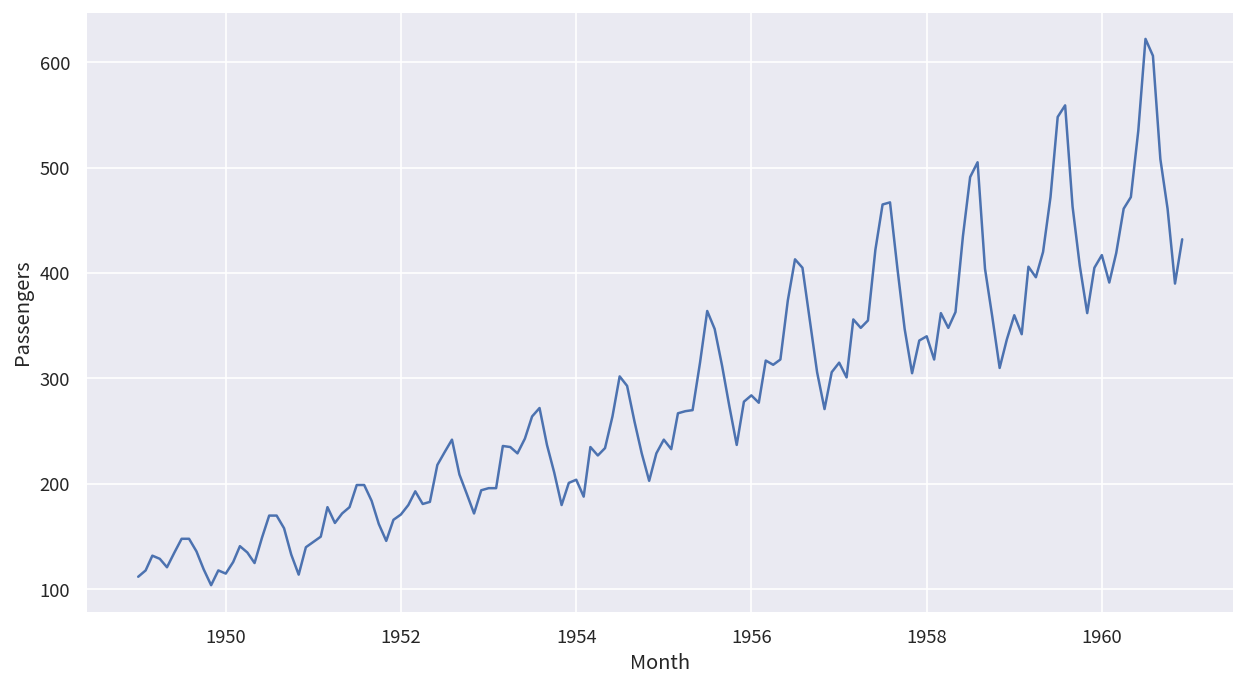

In [7]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(
    data=df1, x=df1.index, y='Passengers',
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


> 파형이 증가하는 추세를 보이고 있으므로 정상성이 충족되지 않는다

#### 2.ADF 테스트
시계열 데이터의 정상성 여부를 판단하기 위한 검정

In [8]:
ar = adfuller(df1['Passengers'])
ar

(np.float64(0.8153688792060482),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [10]:
print('검정통계량 ADF statistic : %f'%ar[0])
print('유의수준 p-value : %f'%ar[1])
print('최적차수 (num of lags): %f' %ar[2])
print('관측치 개수 (num of observations) : %f' %ar[3])
print('기각값 (critical values)')
for key,value in ar[4].items():
  print('\t%s : %.3f' %(key,value))


print('데이터 정상성 여부 : ', ' 정상성 충족' if ar[1] <= 0.05 else '정상성 충족 안함')

검정통계량 ADF statistic : 0.815369
유의수준 p-value : 0.991880
최적차수 (num of lags): 13.000000
관측치 개수 (num of observations) : 130.000000
기각값 (critical values)
	1% : -3.482
	5% : -2.884
	10% : -2.579
데이터 정상성 여부 :  정상성 충족 안함


> 데이터가 정상성을 충족핮 않기 떄문에 차분을 통해 정상성을 충족하는 형태로 전처리를 수행해야 한다

### #04.차분
- 각각의 관측값과 바로 이전 관측값 사이의 차이
- 시계열 분석에서 정상성 확보를 위해 가장 많이 사용

#### 1차 차분
- 1번쨰 값은 이전 값이 없으므로 결측치 발생> 제거

In [11]:
df2 = df1.diff().dropna()
df2

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


> 위의 새로운 테이블로 다시 정상성 확인

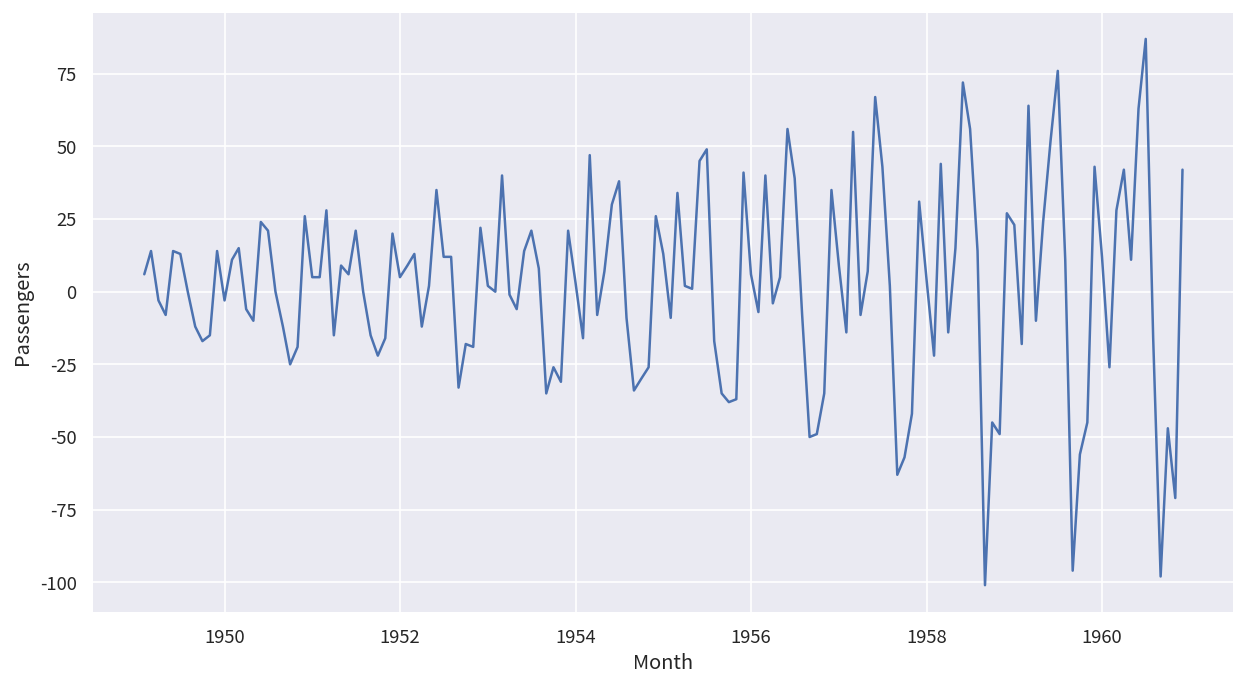

검정통계량 ADF statistic : -2.829267
유의수준 p-value : 0.054213
최적차수 (num of lags): 12.000000
관측치 개수 (num of observations) : 130.000000
기각값 (critical values)
	1% : -3.482
	5% : -2.884
	10% : -2.579
데이터 정상성 여부 :  정상성 충족 안함


In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(
    data=df2, x=df2.index, y='Passengers',
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료

ar = adfuller(df2['Passengers'])
ar


print('검정통계량 ADF statistic : %f'%ar[0])
print('유의수준 p-value : %f'%ar[1])
print('최적차수 (num of lags): %f' %ar[2])
print('관측치 개수 (num of observations) : %f' %ar[3])
print('기각값 (critical values)')
for key,value in ar[4].items():
  print('\t%s : %.3f' %(key,value))


print('데이터 정상성 여부 : ', ' 정상성 충족' if ar[1] <= 0.05 else '정상성 충족 안함')


#### 2차 차분
- 정상성이 충족될 떄 까지 차분을 진행해야 한다

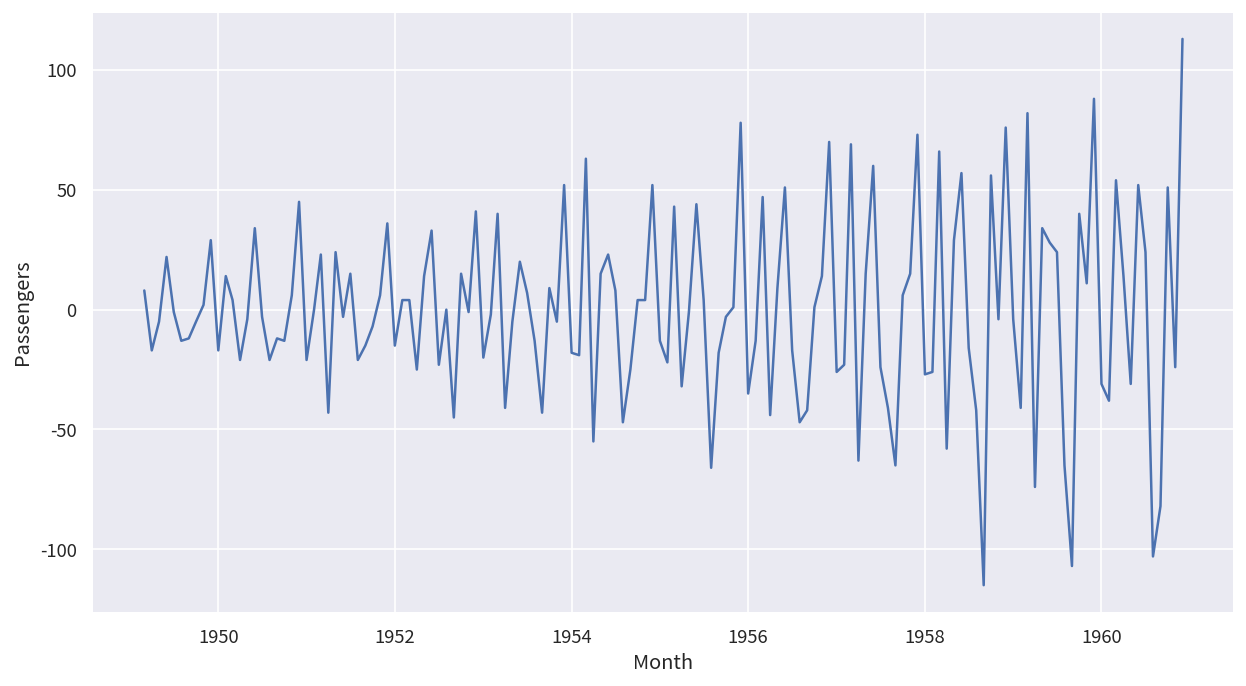

검정통계량 ADF statistic : -16.384232
유의수준 p-value : 0.000000
최적차수 (num of lags): 11.000000
관측치 개수 (num of observations) : 130.000000
기각값 (critical values)
	1% : -3.482
	5% : -2.884
	10% : -2.579
데이터 정상성 여부 :   정상성 충족


In [16]:
df3=df2.diff().dropna()


# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(
    data=df3, x=df3.index, y='Passengers',
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료

ar = adfuller(df3['Passengers'])
ar


print('검정통계량 ADF statistic : %f'%ar[0])
print('유의수준 p-value : %f'%ar[1])
print('최적차수 (num of lags): %f' %ar[2])
print('관측치 개수 (num of observations) : %f' %ar[3])
print('기각값 (critical values)')
for key,value in ar[4].items():
  print('\t%s : %.3f' %(key,value))


print('데이터 정상성 여부 : ', ' 정상성 충족' if ar[1] <= 0.05 else '정상성 충족 안함')